In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1 We’ll start with data on air quality in New York City in 1973. Here is a link:

df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/airquality.csv')

In [3]:
# 2 Display the first rows of the data frame in the console.

df.head()

,Ozone,Solar_R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [4]:
# 3 What are the types of columns in the data frame?  Write the code to display them.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar_R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [5]:
# 4 What is the total number of NA values in the data frame?  What fraction of all the values in the data frame are NA's?

df.isna().sum().sum()

44

In [6]:
# 5 How many rows contain NA values?

(df.isna().sum(axis=1) > 0).sum()

42

In [7]:
# 6 For each column, what fraction of the column values are NA values?

df.isna().sum() / df.index.size

Ozone      0.241830
Solar_R    0.045752
Wind       0.000000
Temp       0.000000
Month      0.000000
Day        0.000000
dtype: float64

In [8]:
# 7 For each row, what fraction of the row values are NA?

df.isna().sum(axis=1) / df.columns.size

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.333333
         ...   
148    0.000000
149    0.166667
150    0.000000
151    0.000000
152    0.000000
Length: 153, dtype: float64

<AxesSubplot:>

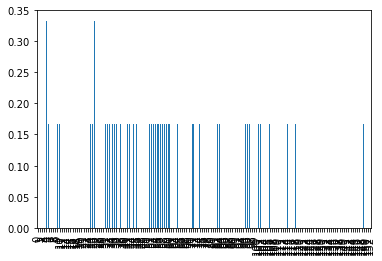

In [9]:
# 8 Following problem 6, plot, for each column, the fraction of the values in that column that are NA.

data = (df.isna().sum(axis=1) / df.columns.size)
data.plot.bar()

In [10]:
# 9 In this data set, if you decided to remove the NA values, would you do it by removing rows, or by removing columns?

#If I had to choose I would be removing by rows because that is less likely to skew the data.

In [11]:
# 10 Create a new data frame df_cleanrows that is like dat except all rows containing NA values are removed.  Verify that there are no NA values in df_cleanrows

df_cleanrows = df.dropna()
df_cleanrows

,Ozone,Solar_R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [12]:
# 11 Create a new data frame df_cleancols that is like dat except all columns containing NA values are removed.

df_cleancols = df.dropna(axis=1)
df_cleancols

,Wind,Temp,Month,Day
0,7.4,67,5,1
1,8.0,72,5,2
2,12.6,74,5,3
3,11.5,62,5,4
4,14.3,56,5,5
...,...,...,...,...
148,6.9,70,9,26
149,13.2,77,9,27
150,14.3,75,9,28
151,8.0,76,9,29


In [13]:
# 12 Which contains more data, df_cleanrows, or df_cleancols? 

if (df_cleanrows.size > df_cleancols.size):
    print(f"df_cleanrows: {df_cleanrows.size} > df_cleancols: {df_cleancols.size}")
else:
    print(f"df_cleancols: {df_cleancols.size} > df_cleanrows: {df_cleanrows.size}")


df_cleanrows: 666 > df_cleancols: 612


In [14]:
# 13 Create a new data frame df_med from your original data frame ‘df’ by replacing each NA value with the median of its column.

df_med = df.fillna(value=df.median())
df_med

,Ozone,Solar_R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,31.5,205.0,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,31.5,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [15]:
# 14 Create a new data frame df_mean from your original data frame ‘df’ by replacing each NA value with the mean of its column.

df_mean = df.fillna(value=df.mean())
df_mean

,Ozone,Solar_R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26
149,42.12931,145.000000,13.2,77,9,27
150,14.00000,191.000000,14.3,75,9,28
151,18.00000,131.000000,8.0,76,9,29
